# Pipeline

For demonstration purpases we use a prerecorded run. We divide this run into chunks of length $N$ and on them do our processing and prediction steps. In reality the chunks would be a sliding window in time. 


In [7]:
import os
import json
import numpy as np
from matplotlib import pyplot as plt
from utils import load_as_dataframe
from load_model import svm_predict
from visualization import visualize

## Load run

In [8]:
folder = 'data'
subfolder = 'mixed'
filename = 'mixed_farness_1_moving_2_radardata_2022_05_08_17_41_04.npz'

df = load_as_dataframe(os.path.join(folder, subfolder), filename)
print(df)

          abses0    abses1    abses2      phases
0       0.306305  1.199855  0.507185    0.029124
1       0.251889  1.020503  0.248373    0.168270
2       0.226207  0.760687  0.038820   -0.579826
3       0.190634  0.446355  0.334598   -0.760279
4       0.112120  0.385904  0.602546   -1.238474
...          ...       ...       ...         ...
179995  1.048006  2.950076  2.831122  111.171232
179996  1.285246  2.957662  2.834744  111.117071
179997  1.329203  2.968381  2.867797  111.085840
179998  1.226011  2.966421  2.884763  111.043672
179999  1.225000  2.982215  2.923418  111.009325

[180000 rows x 4 columns]


## Model

In [9]:
movement_model_folder = 'svm_acc_95_2022_05_08_16_19_22'

with open(os.path.join(movement_model_folder, 'hyperparams.json'), 'r') as f:
    hyperparams = json.load(f)

In [10]:
pred_movement = svm_predict(movement_model_folder, df)
pred_movement_repeatd = np.repeat(pred_movement, hyperparams['chunk_size'])


100%|██████████| 60/60 [00:00<00:00, 117.87it/s]


In [11]:
stress_model_folder = 'stress_svm_acc_85_2022_05_08_17_18_08'

with open(os.path.join(movement_model_folder, 'hyperparams.json'), 'r') as f:
    hyperparams = json.load(f)
    
pred_stress = svm_predict(stress_model_folder, df)
pred_stress_repeatd = np.repeat(pred_stress, hyperparams['chunk_size'])
pred_stress_repeatd[pred_movement_repeatd == 1] = np.nan


100%|██████████| 60/60 [00:00<00:00, 124.87it/s]


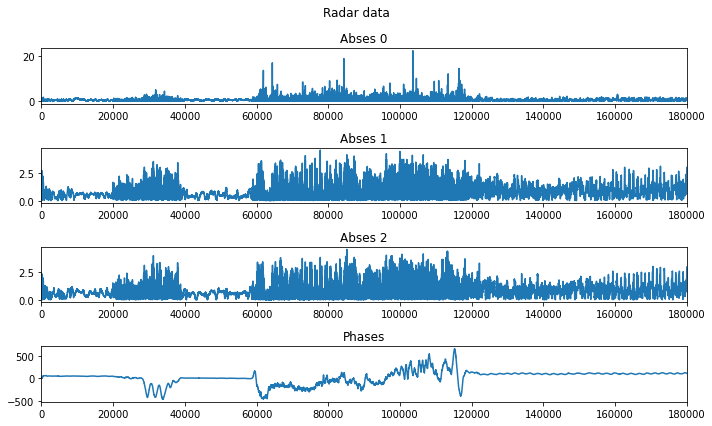

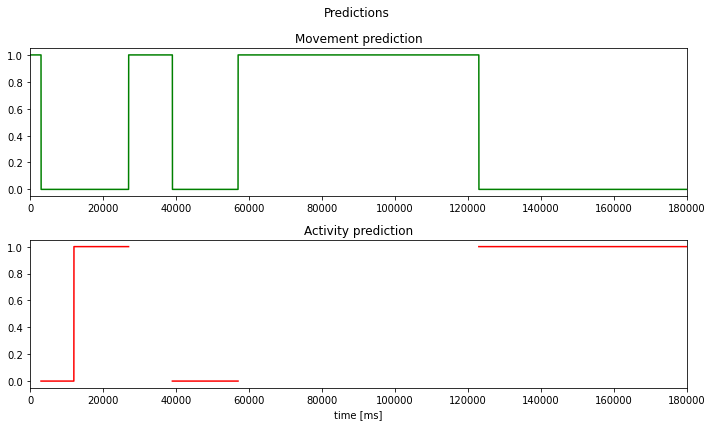

In [12]:
title = 'Radar data'
color = None
figsize = (10, 6)

visualize(os.path.join(folder, subfolder), filename, title, color, figsize=figsize, xlim=[0, len(pred_stress_repeatd)])

fig, ax = plt.subplots(2, 1, figsize=figsize)
fig.suptitle('Predictions')

ax[0].plot(pred_movement_repeatd, color='g')
ax[0].set_title('Movement prediction')
ax[0].set_xlim([0, len(pred_stress_repeatd)])


ax[1].plot(pred_stress_repeatd, color='r')
ax[1].set_title('Activity prediction')
ax[1].set_xlim([0, len(pred_stress_repeatd)])
ax[1].set_xlabel('time [ms]')
fig.tight_layout()